# membangun model klasifikasi menggunakan algoritma Random Forest guna memprediksi apakah seseorang akan melakukan pembelian berdasarkan dua fitur utama, yaitu usia (Age) dan gaji (Estimated Salary), berdasarkan dataset iklan dari jejaring sosial 

## Import pustaka yang digunakan

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Import / membaca dataset

In [3]:

df_net = pd.read_csv('Social_Network_Ads.csv')
df_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## memilih kolom yang relevan

In [4]:

df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## melihat deskripsi / statistik dasar data

In [5]:

df_net.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## melihat distribusi gaji (estimated salary) menggunakan plot distribusi dari seaborn

C:\Users\fadli\AppData\Local\Temp\ipykernel_11200\271812616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

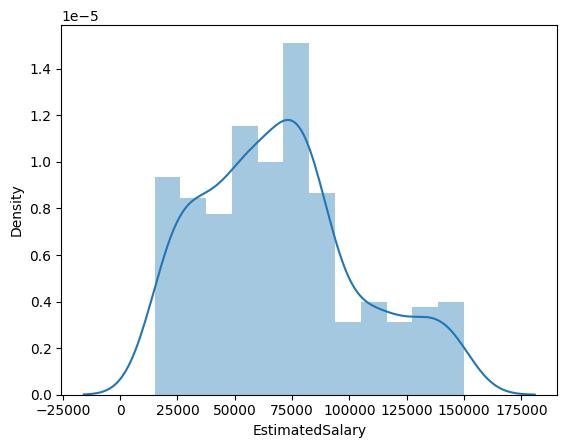

In [6]:

sns.distplot(df_net['EstimatedSalary'])

## Label encoding
### mengubah kolom gender dari nilai kategorikal menjadi numerik

In [7]:

le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

### menghitung korelasi antar kolom dan menampilkan matriks kolerasi dengan heatmap untuk melihat hubungan antar variable

In [8]:

df_net.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

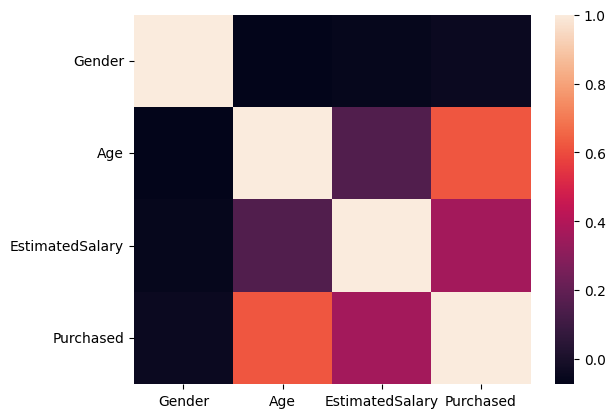

In [9]:
sns.heatmap(df_net.corr())

### menghapus kolom gender setelah selesai digunakan

In [10]:

df_net.drop(columns=['Gender'], inplace=True)

### menampilkan scatter plot yang menunjukan hubungan antara usia dan gaji

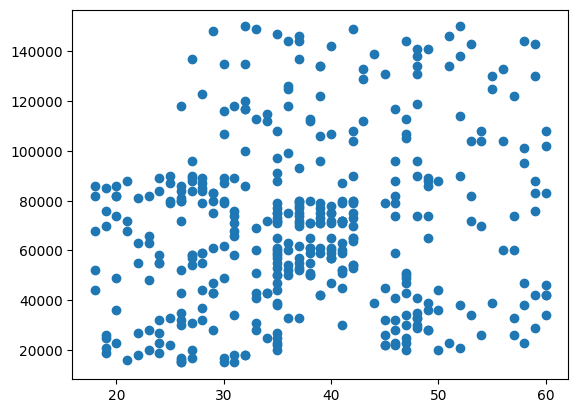

In [11]:

plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

### memisahkan variabel independen dan dependen

In [12]:

X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

### membagi dataset menjadi 25% data untuk pengujian dan 75% data untuk pelatihan

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

### Melakukan penskalaan fitur agar nilai-nilai dari variabel independen berada dalam rentang yang serupa.

In [14]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Melatih model Random Forest menggunakan data pelatihan.

In [15]:

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Melakukan prediksi terhadap set pengujian dan mencetak hasil prediksi dibandingkan dengan nilai aktual.

In [16]:

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### Menghitung akurasi model, yaitu persentase prediksi yang benar

In [17]:

accuracy_score(y_test, y_pred)

0.88

## Classification report
### Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score.

In [18]:

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.81      0.93      0.87        42

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100



#### 1. Precision mengukur seberapa akurat prediksi positif dari model. Dengan kata lain, precision menunjukkan persentase dari semua prediksi positif yang benar-benar positif.
#### 2. Recall mengukur seberapa baik model dapat menemukan semua kasus positif dalam dataset.
#### 3. F1-Score adalah metrik harmonisasi antara precision dan recall. F1-Score memberikan gambaran lebih komprehensif tentang performa model ketika Anda ingin mencapai keseimbangan antara precision dan recall.

## F1 score

In [19]:

print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8666666666666667


### Prediction on training set|
### Memvisualisasikan hasil prediksi pada set pelatihan.

C:\Users\fadli\AppData\Local\Temp\ipykernel_11200\4035681082.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


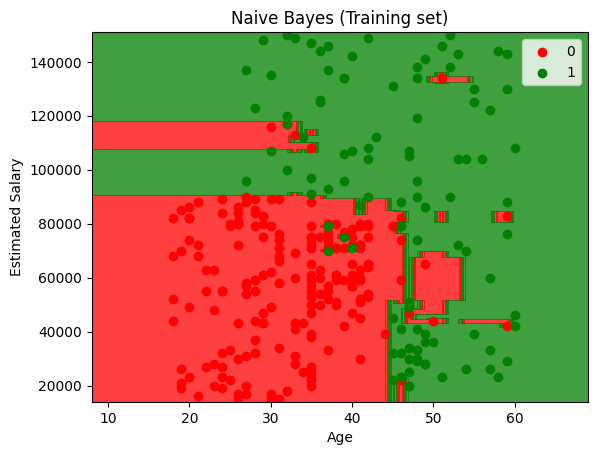

In [20]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Prediction on test set
### Sama seperti set pelatihan, memvisualisasikan hasil prediksi pada set pengujian.

C:\Users\fadli\AppData\Local\Temp\ipykernel_11200\305809455.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


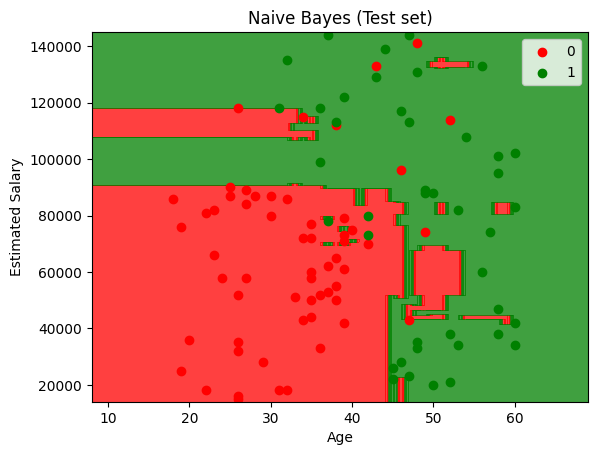

In [21]:

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()